# Are we Seeing Deglobalization?

Globalization is, if nothing else, a contentious topic, deglobalisation even more so. There are numerous different aspects to assess when trying to quantify globalization, some of which may have a more direct impact on you than others. This could include everything from shifts in globalized pop culture to the power of international organizations. While all of these are valid topics, which I hope to investigate in future, I think the best place to begin is trade. Trade is, of course, the life blood of globalization and is relatively straightforward to quantify. If we accept that deglobalisation is measurable through changes in the volume of international trade and global gdp we would expect to see:

1) A decrease in the rate of world GDP growth.

2) A decrease in the rate of trade volume growth.

3) A decrease in the rate of growth of trade volume as a percent of GDP.


Of the three of these, a significant decrease in the rate of trade volume growth as a percent of GDP (a divergence between gdp and trade volume), would be the most convincing evidence that deglobalization is occurring. A reduction of growth rate of global GDP and trade volume simultaneously could denote a recession/depression without necessarily pointing to a reduction in global interconnectedness. 



In [98]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Importing Data

# Getting World GDP, Exports, Impors Since 1990-2022 
# from the World Bank https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.CD&country=#

 # this is in current US Dollars (2022)

# Regional GDP% Growth
#gdpg = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Regional_GDP%_ 1961_data.xlsx')

# Global GDP: https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.CD&country=#
ggdp = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Regional_GDP_1961_data.xlsx')

# Regional Imports
rimp = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Regional_Import_1961_data.xlsx')

# Regional Exports
rexp = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Regional_Export_1961_data.xlsx')


In [3]:
# Cleaning Data

def clean(i):
    i = i.drop(columns = ["Series Name", "Series Code", "Time Code"])
    i = i.drop(index=[0,1,2,3,4,5,6,7,8,9,62, 63, 64, 65, 66])
    i = i.rename(columns = {'Time':'Year'})
    i.replace('..', np.nan, inplace=True)
    i = i.dropna(axis=1)
    i["Year"]  = i["Year"].astype(int)
    i.set_index("Year", inplace=True) 
    return i

ggdp1 = clean(ggdp)
rexp1 = clean(rexp)
rimp1 = clean(rimp)


In [66]:
# Calculate Trade Volume
tradevol = rexp1["World [WLD]"] + rimp1['World [WLD]']

# Back to dataframe
tradevol = pd.DataFrame(tradevol)

# Rename 
tradevol = tradevol.rename(columns={'World [WLD]':'World Trade Volume'})

In [69]:
#################### Calculate % Change GDP #################################

# Calculate Percent change 
gdpp = ggdp1['World [WLD]']

# Back to dataframe
gdpp = pd.DataFrame(gdpp)

gdpp = gdpp["World [WLD]"].pct_change() * 100

# Drop first row
gdpp = gdpp.dropna()

# Back to dataframe
gdpp = pd.DataFrame(gdpp)

# Rename 
gdpp = gdpp.rename(columns={'World [WLD]':"World GDP % Growth Rate"})

################### Calculate % Change Trade Volume #########################

# Calculate percentage change
tvp = tradevol['World Trade Volume'].pct_change() * 100

# Drop the first row 
tvp = tvp.dropna()

# Back to a dataframe 
tvp = pd.DataFrame(tvp)

# Rename 
tvp = tvp.rename(columns={'World Trade Volume':'Trade Volume % Growth'})

################### Calculate Trade Volume as a Percent of GDP #############

tgp = (tradevol['World Trade Volume']/ggdp1['World [WLD]']) * 100

# Back to dataframe
tgp = pd.DataFrame(tgp)

# Rename
tgp = tgp.rename(columns={0:'Trade Volume as % of World GDP'})

################ Calculate Growth Rate of Trade as a Percent of GDP ########
tgpgr = tgp.pct_change()*100

# Back to dataframe
tgpgr = pd.DataFrame(tgpgr)
tgpgr = tgpgr.rename(columns={'Trade Volume as % of World GDP':'Trade Volume as % of World GDP Growth Rate'})


################# Create dataframe ##########################################

df = pd.merge(tvp, pd.merge(gdpp, pd.merge(tgp, tgpgr, left_index=True, right_index=True), left_index=True, right_index=True), left_index=True, right_index=True)

# Subset Data from after 2008 and before 2008
df07 = df.loc[:2007]
df08 = df.loc[2008:]


In [99]:
df.describe()

,Trade Volume % Growth,World GDP % Growth Rate,Trade Volume as % of World GDP,Trade Volume as % of World GDP Growth Rate
count,51.000000,51.000000,51.000000,51.000000
mean,9.331239,7.105089,45.281722,1.890665
std,11.190144,6.346109,9.958838,5.858497
min,-19.427892,-5.703968,26.322301,-15.005761
25%,1.672158,2.720313,36.960513,-2.278673
50%,10.687089,6.488746,43.297372,2.411624
75%,15.976770,12.173759,55.898593,4.769674
max,40.082193,21.396434,61.534798,22.279638


In [72]:
# Mean Growth Rates
print("Before 2008")
print(df07.mean())
print('')
print('After 2008')
print(df08.mean())


Before 2008
Trade Volume % Growth                         11.260638
World GDP % Growth Rate                        8.458792
Trade Volume as % of World GDP                40.289581
Trade Volume as % of World GDP Growth Rate     2.468322
dtype: float64

After 2008
Trade Volume % Growth                          4.700681
World GDP % Growth Rate                        3.856204
Trade Volume as % of World GDP                57.262860
Trade Volume as % of World GDP Growth Rate     0.504289
dtype: float64


(array([[ 1.,  3., 16., 11., 14.,  4.,  1.,  1.,  0.,  0.],
        [ 0.,  2., 22., 17.,  9.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., 13., 14.,  7., 16.]]),
 array([-19.42789248, -11.33162344,  -3.23535441,   4.86091463,
         12.95718367,  21.0534527 ,  29.14972174,  37.24599078,
         45.34225982,  53.43852885,  61.53479789]),
 <a list of 3 BarContainer objects>)

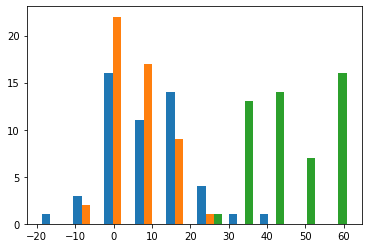

In [21]:
plt.hist(df)


In [88]:
# Checking for normality of data
 
# Skewness measures the asymmetry of the distribution 
# Kurtosis measures the "tailedness" or peakedness of the distribution 

# For a normal distribution, skewness is close to zero, and kurtosis is close to 3.

# Checking 08-22
skew08 = stats.skew(df08)
kurt08 = stats.kurtosis(df08)
print("The skewness or 2008 onward data is", skew08)
print('The kurtosis of 2008 onward data is', kurt08)

# Checking 08-22
skewdf = stats.skew(df)
kurtdf = stats.kurtosis(df)
print("The skewness or overall data is", skewdf)
print('The kurtosis of overall data is', kurtdf)

The skewness or 2008 onward data is [-0.26857264 -0.05579824 -0.28296798 -0.63985224]
The kurtosis of 2008 onward data is [-0.68894493 -0.76894322 -0.90170501 -0.01412511]
The skewness or overall data is [0.16950003 0.14859816 0.2059031  0.35151281]
The kurtosis of overall data is [ 0.63413467 -0.65445759 -1.33148532  2.22298724]


In [56]:
####################### Permutation test #########################

# The skewess/kurtosis tests and visible review of the data in histogram form leads me to beleive that the data is not
# normally distributed. The best way to proceed in the hypothesis test is to implement permutation testing as it is .

# creating a callable object
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)



In [142]:
# Descriptive Stats
print('Correlations')
df.corr()

Correlations


,Trade Volume % Growth,World GDP % Growth Rate,Trade Volume as % of World GDP,Trade Volume as % of World GDP Growth Rate
Trade Volume % Growth,1.000000,0.879171,-0.195856,0.881057
World GDP % Growth Rate,0.879171,1.000000,-0.348668,0.551859
Trade Volume as % of World GDP,-0.195856,-0.348668,1.000000,0.005724
Trade Volume as % of World GDP Growth Rate,0.881057,0.551859,0.005724,1.000000


In [141]:
print('Descriptive Stats 1972-2022')
df.describe()

Descriptive Stats 1972-2022


,Trade Volume % Growth,World GDP % Growth Rate,Trade Volume as % of World GDP,Trade Volume as % of World GDP Growth Rate
count,51.000000,51.000000,51.000000,51.000000
mean,9.331239,7.105089,45.281722,1.890665
std,11.190144,6.346109,9.958838,5.858497
min,-19.427892,-5.703968,26.322301,-15.005761
25%,1.672158,2.720313,36.960513,-2.278673
50%,10.687089,6.488746,43.297372,2.411624
75%,15.976770,12.173759,55.898593,4.769674
max,40.082193,21.396434,61.534798,22.279638


In [139]:
print('Descriptive Stats 1972-2007')
df07.describe()

Descriptive Stats 1972-2007


,Trade Volume % Growth,World GDP % Growth Rate,Trade Volume as % of World GDP,Trade Volume as % of World GDP Growth Rate
count,36.000000,36.000000,36.000000,36.000000
mean,11.260638,8.458792,40.289581,2.468322
std,10.277070,6.147468,7.134897,5.481706
min,-5.367093,-1.427017,26.322301,-5.598751
25%,3.981077,3.365134,35.777647,-1.682264
50%,11.853739,8.327478,37.916655,2.556856
75%,16.246016,12.799398,43.601769,4.726475
max,40.082193,21.396434,58.913321,22.279638


In [140]:
print('Descriptive Stats 2008-2022')
df08.describe()

Descriptive Stats 2008-2022


,Trade Volume % Growth,World GDP % Growth Rate,Trade Volume as % of World GDP,Trade Volume as % of World GDP Growth Rate
count,15.000000,15.000000,15.000000,15.000000
mean,4.700681,3.856204,57.262860,0.504289
std,12.272752,5.773447,3.009491,6.673708
min,-19.427892,-5.703968,52.136705,-15.005761
25%,-1.635828,1.534068,55.898593,-3.121695
50%,2.693422,2.780193,57.037350,-0.084424
75%,13.257506,8.024703,59.621288,5.235350
max,24.641565,13.932370,61.534798,9.399607


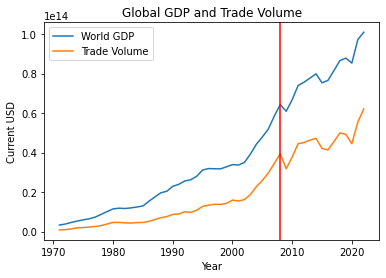

In [131]:
# GDP and Trade Volume

# Plotting
plt.plot(ggdp1['World [WLD]'], label='World GDP')
plt.plot(tradevol['World Trade Volume'], label='Trade Volume')

# Adding Vertical line at y=2008
plt.axvline(x=2008, color='red', linestyle='-')

# Adding labels
plt.xlabel('Year')
plt.ylabel('Current USD')
plt.title('Global GDP and Trade Volume')
plt.legend()

# Display the plot
plt.show()

In [91]:
# Hypothesis test 1)
# GDP% Change

# set x and y
x = df08['World GDP % Growth Rate']
y =  df07['World GDP % Growth Rate']

# what is the statistic: statistic=-4.602587974901899, pvalue=0.0074
print(statistic(x,y,0))
# Calculate p-value
p_value = stats.permutation_test((x,y), statistic, alternative='less', n_resamples=9999)
p_value

-4.602587974901901


PermutationTestResult(statistic=-4.602587974901899, pvalue=0.0074, null_distribution=array([-1.5742186 ,  1.3057731 , -2.85329341, ...,  2.92211432,
        2.19053814, -0.64469413]))

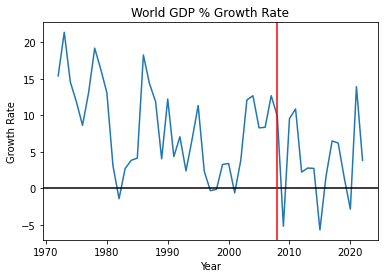

In [130]:
plt.plot(df['World GDP % Growth Rate'])

# Adding horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')

# Adding Vertical line at y=2008
plt.axvline(x=2008, color='red', linestyle='-')

# Adding labels
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('World GDP % Growth Rate')

# Display the plot
plt.show()

In [92]:
# Hypothesis test 2) 
# Trade Volume% Change


# set x and y
x = df08['Trade Volume % Growth']
y =  df07['Trade Volume % Growth']

# what is the statistic: statistic=-6.559957025968546, pvalue=0.0244
print(statistic(x,y,0))
# Calculate p-value
p_value = stats.permutation_test((x,y), statistic, alternative='less', n_resamples=9999)
p_value

-6.559957025968546


PermutationTestResult(statistic=-6.559957025968546, pvalue=0.0244, null_distribution=array([ 4.01330151,  3.51055716, -2.63417438, ...,  1.30613093,
       -3.3013421 , -3.48988838]))

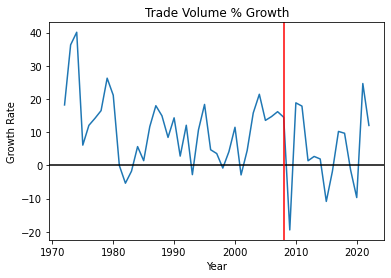

In [132]:
plt.plot(df['Trade Volume % Growth'])

# Adding horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')

# Adding Vertical line at y=2008
plt.axvline(x=2008, color='red', linestyle='-')

# Adding labels
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Trade Volume % Growth')

# Display the plot
plt.show()

In [94]:
# Hypotheis Test 3)

# Trade Volume as a % of GDP Growth Rate

# set x and y
x = df08['Trade Volume as % of World GDP Growth Rate']
y =  df07['Trade Volume as % of World GDP Growth Rate']

# what is the statistic: statistic=-1.9640328679103263, pvalue=0.1409
print(statistic(x,y,0))
# Calculate p-value
p_value = stats.permutation_test((x,y), statistic, alternative='less', n_resamples=9999)
p_value

-1.9640328679103263


PermutationTestResult(statistic=-1.9640328679103263, pvalue=0.1409, null_distribution=array([-1.57523812, -3.20832881,  0.02313966, ...,  0.11501954,
        3.29238232,  0.50927044]))

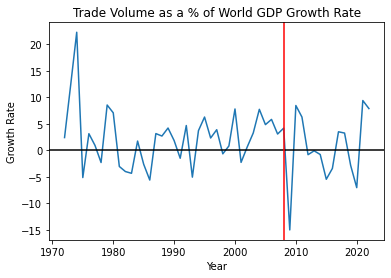

In [133]:
plt.plot(df['Trade Volume as % of World GDP Growth Rate'])

# Adding horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')

# Adding Vertical line at y=2008
plt.axvline(x=2008, color='red', linestyle='-')

# Adding labels
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Trade Volume as a % of World GDP Growth Rate')

# Display the plot
plt.show()

In [148]:
# Hypotheis Test 3.5)

# Trade Volume as a % of GDP Growth Rate 1990-2008 vs. 2008-2022

# set x and y
x = df08['Trade Volume as % of World GDP Growth Rate']
y =  df07['Trade Volume as % of World GDP Growth Rate'].loc[1996:]

# what is the statistic: statistic=-1.9640328679103263, pvalue=0.1409
print(statistic(x,y,0))
# Calculate p-value
p_value = stats.permutation_test((x,y), statistic, alternative='less', n_resamples=9999)
p_value

-2.608290082237941


PermutationTestResult(statistic=-2.608290082237941, pvalue=0.1141, null_distribution=array([ 1.45309716,  0.56632867, -2.03136008, ..., -2.79770648,
       -0.47195009, -3.53565475]))

In [93]:

# Trade Volume as a % of GDP 

# set x and y
x = df08['Trade Volume as % of World GDP']
y =  df07['Trade Volume as % of World GDP']

# what is the statistic: statistic=16.9732786546439, pvalue=0.0001
print(statistic(x,y,0))
# Calculate p-value
p_value = stats.permutation_test((x,y), statistic, alternative='greater', n_resamples=9999)
p_value

16.973278654643906


PermutationTestResult(statistic=16.9732786546439, pvalue=0.0001, null_distribution=array([ 6.37819868,  0.4844971 , -0.34092941, ..., -3.59204661,
        3.2265712 , -0.23559245]))

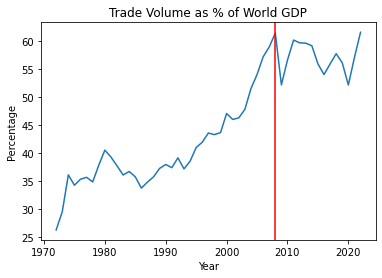

In [134]:
plt.plot(df['Trade Volume as % of World GDP'])

# Adding Vertical line at y=2008
plt.axvline(x=2008, color='red', linestyle='-')

# Adding labels
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Trade Volume as % of World GDP')

# Display the plot
plt.show()